# Milestone 1

## Muhammad Galang Al-Hakim

## HCK - 004

# Problem Statement

Memprediksi kemungkinan orang yang gagal membayar tagihan pinjol (Default) pada bulan berikutnya menggunakan Supervised Learning (ML)

# Big Query

In [ ]:
%%sql @noteable
SELECT  
  CAST(limit_balance AS INT64) AS limit_balance, 
  CAST(sex AS INT64) AS sex, 
  CAST(education_level AS INT64) AS education_level, 
  CAST(marital_status AS INT64) AS marital_status, 
  CAST(age AS INT64) AS age, 
  CAST(pay_0 AS INT64) AS pay_0, 
  CAST(pay_2 AS INT64) AS pay_2, 
  CAST(pay_3 AS INT64) AS pay_3, 
  CAST(pay_4 AS INT64) AS pay_4, 
  CAST(pay_5 AS FLOAT64) AS pay_5, 
  CAST(pay_6 AS FLOAT64) AS pay_6, 
  CAST(bill_amt_1 AS INT64) AS bill_amt_1, 
  CAST(bill_amt_2 AS INT64) AS bill_amt_2, 
  CAST(bill_amt_3 AS INT64) AS bill_amt_3, 
  CAST(bill_amt_4 AS INT64) AS bill_amt_4, 
  CAST(bill_amt_5 AS INT64) AS bill_amt_5, 
  CAST(bill_amt_6 AS INT64) AS bill_amt_6, 
  CAST(pay_amt_1 AS INT64) AS pay_amt_1, 
  CAST(pay_amt_2 AS INT64) AS pay_amt_2, 
  CAST(pay_amt_3 AS INT64) AS pay_amt_3, 
  CAST(pay_amt_4 AS INT64) AS pay_amt_4, 
  CAST(pay_amt_5 AS INT64) AS pay_amt_5, 
  CAST(pay_amt_6 AS INT64) AS pay_amt_6, 
  CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 8000

In [ ]:
pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 10.3 MB/s eta 0:00:00


Note: you may need to restart the kernel to use updated packages.


# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE


#model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#save model
import pickle

# Data Loading

In [2]:
df = pd.read_csv('P1W2M1.csv')
df

In [3]:
# run 10 data teratas
df.head(10)

In [4]:
# run 10 data terbawah
df.tail(10)

In [5]:
# info mengenai dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   int64  
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   int64  
 5   pay_0                       2965 non-null   int64  
 6   pay_2                       2965 non-null   int64  
 7   pay_3                       2965 non-null   int64  
 8   pay_4                       2965 non-null   int64  
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   int64  
 12  bill_amt_2                  2965 non-null   int64  
 13  bill_amt_3                  2965 

In [6]:
# mendeskripsikan dataset yang digunakan
df.describe()

In [7]:
# mengecek adkah missing value pada dataset
df.isna().sum()

In [8]:
# melakukan pengecekan data duplikasi
df.duplicated().sum()

1

In [9]:
# mendrop data yang duplikasi
df = df.drop_duplicates()

In [10]:
df.nunique()

# Exploration Data Analysis (EDA)

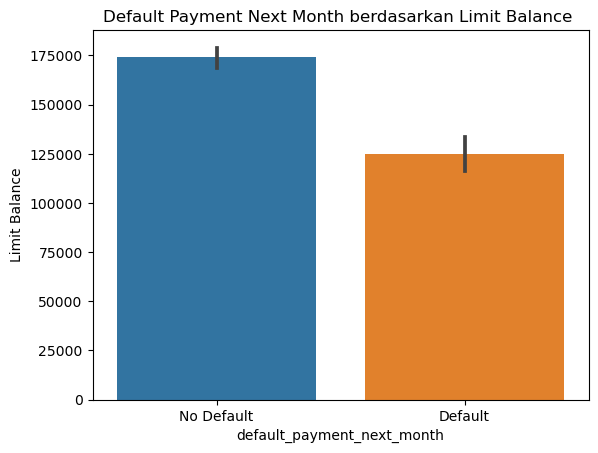

In [ ]:
sns.barplot(x='default_payment_next_month', y='limit_balance', data=df)
plt.xticks([0, 1], ['No Default', 'Default'])
plt.ylabel('Limit Balance')
plt.title('Default Payment Next Month berdasarkan Limit Balance ')
plt.show()

pengutang pinjol yang gagal bayar dan juga yang bisa membayarkan utangnya mendapatkan jumlah limit lebih tinggi.

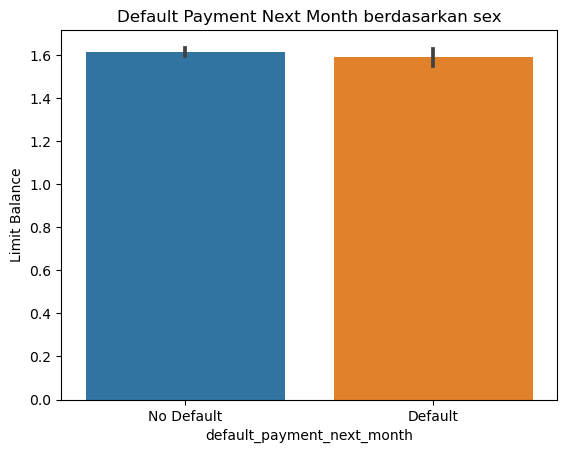

In [ ]:
sns.barplot(x='default_payment_next_month', y='sex', data=df)
plt.xticks([0, 1], ['No Default', 'Default'])
plt.ylabel('Limit Balance')
plt.title('Default Payment Next Month berdasarkan sex')
plt.show()

perbandingan pengutang yang gagal bayar dan juga yang tidar bermasalah.

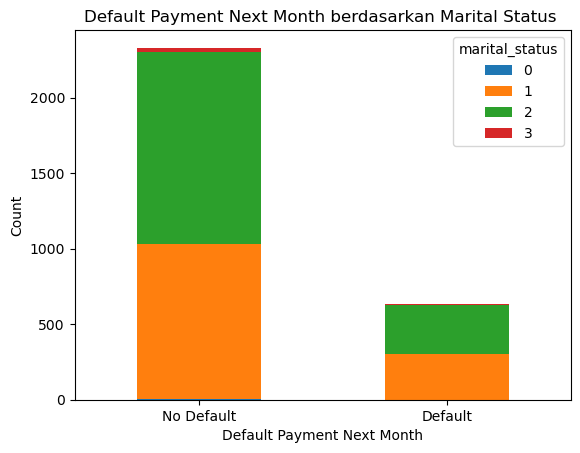

In [ ]:
status_counts = df.groupby(['default_payment_next_month', 'marital_status']).size().unstack()
status_counts.plot(kind='bar', stacked=True)
plt.xticks([0, 1], ['No Default', 'Default'], rotation=0)
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.title('Default Payment Next Month berdasarkan Marital Status ')
plt.show()

perbandingan status pernikahan antara penguntang gagal bayar dan juiga pengutang yang tidak bermasalah

In [11]:
df.groupby('default_payment_next_month').mean()

In [12]:
df.groupby('default_payment_next_month').count()

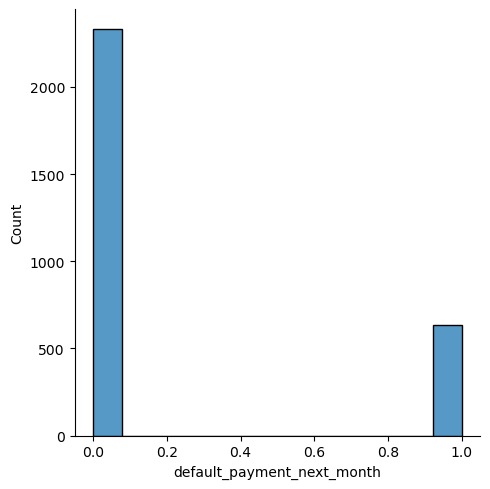

In [ ]:
sns.displot(df['default_payment_next_month'])

In [ ]:
jumlah total pengutang yang gagal bayar dan juga pengutang yang tidak bermasalah

SyntaxError: invalid syntax (3657723194.py, line 1)

In [13]:
df.groupby('default_payment_next_month')[['age']].mean()

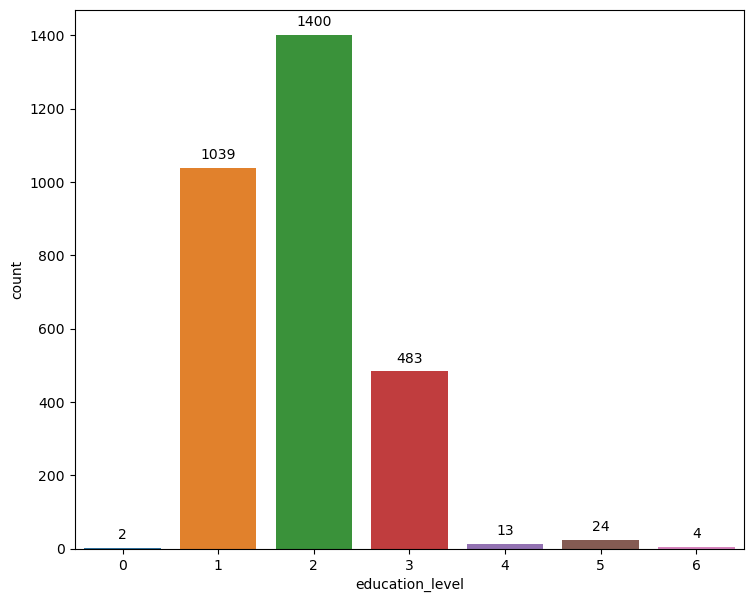

In [ ]:
plt.figure(figsize=(19,7))
plt.subplot(1,2,1)
fig = sns.countplot(x='education_level', data = df)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 25, '{:1.0f}'.format(height), ha="center")

sebaran data berdasarkan tingkat pendidikan
1 = pendidikan sekolah menengah kebawah
2 = lulusan sarjana
3 = lulusan sekolah menengah keatas
4> = lainnya

<AxesSubplot: xlabel='marital_status'>

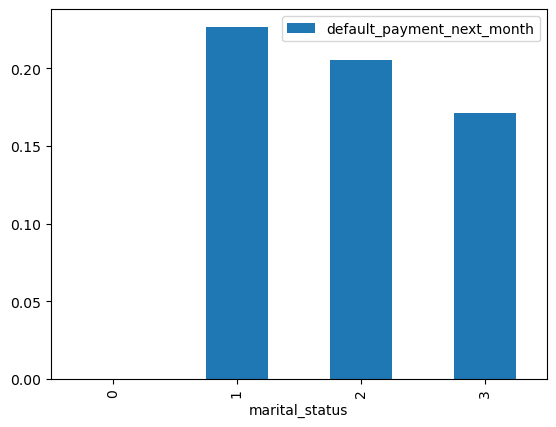

In [15]:
df.groupby('marital_status')[['default_payment_next_month']].mean().plot(kind='bar')

<AxesSubplot: xlabel='education_level'>

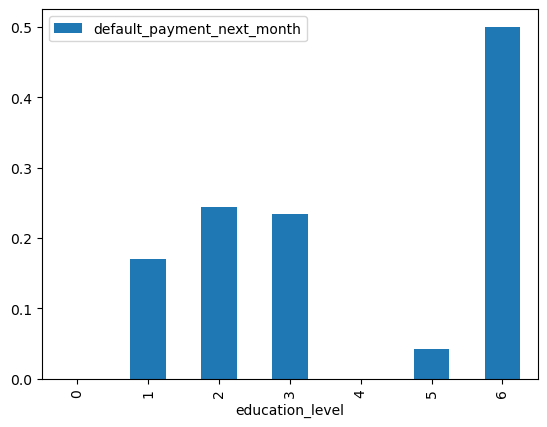

In [16]:
df.groupby('education_level')[['default_payment_next_month']].mean().plot(kind='bar')

# Data Preprocessing

## Feature Selection

In [18]:
num_col = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_col = ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

## Data Split

In [19]:
X = df.drop(['default_payment_next_month'],axis=1)
y = df['default_payment_next_month']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100, stratify=y)
print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (2965, 23) (2965,) 
Training set  --->  (2372, 23) (2372,) 
Testing set   --->  (593, 23)  (593,)


In [22]:
X_train

In [43]:
cat_col

['sex',
 'education_level',
 'marital_status',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6']

In [53]:
X_train.pay_6.unique()

array([ 0., -1.,  2., -2.,  4.,  3.,  7.,  6.])

# Preprocessing

## Pipeline

In [54]:
# define the preprocessing steps for categorical and numerical columns
cat_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[[1, 2], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3], [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8], [-2, -1, 0, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 2, 3, 4, 6, 7]]))
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('pca',PCA(n_components=6))
])

# create the column transformer to apply the preprocessing steps to the data
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_col),
    ('num', num_transformer, num_col)
])

# create the pipeline to apply the logistic regression, decision tree classifier,
# support vector machine, random forest, naive bayes, knn, adaboost, and xgboost models
pipeline_tuned = imbPipeline([
    ('preprocessor', preprocessor),
    ('sampling', SMOTE()),
    ('classifier', None)
])

# define the models to be applied in the pipeline
models = [LogisticRegression(), DecisionTreeClassifier(), SVC(), RandomForestClassifier(),
          GaussianNB(), KNeighborsClassifier(), AdaBoostClassifier()]

# train and evaluate each model using cross-validation
from sklearn.model_selection import cross_val_score

for model in models:
    pipeline_tuned.set_params(classifier=model)
    scores_train = cross_val_score(pipeline_tuned, X_train, y_train, cv=5)
    scores_test = cross_val_score(pipeline_tuned, X_test, y_test, cv=5)
    print(f'{type(model).__name__} Accuracy: {scores_train.mean():.3f} (+/- {scores_train.std():.3f})')
    print(f'{type(model).__name__} Accuracy: {scores_test.mean():.3f} (+/- {scores_test.std():.3f})')


LogisticRegression Accuracy: 0.667 (+/- 0.031)
LogisticRegression Accuracy: 0.729 (+/- 0.014)


DecisionTreeClassifier Accuracy: 0.739 (+/- 0.018)
DecisionTreeClassifier Accuracy: 0.766 (+/- 0.037)


SVC Accuracy: 0.806 (+/- 0.011)
SVC Accuracy: 0.801 (+/- 0.029)


RandomForestClassifier Accuracy: 0.810 (+/- 0.010)
RandomForestClassifier Accuracy: 0.833 (+/- 0.017)


GaussianNB Accuracy: 0.511 (+/- 0.055)
GaussianNB Accuracy: 0.535 (+/- 0.056)


KNeighborsClassifier Accuracy: 0.676 (+/- 0.010)
KNeighborsClassifier Accuracy: 0.688 (+/- 0.033)


AdaBoostClassifier Accuracy: 0.811 (+/- 0.013)
AdaBoostClassifier Accuracy: 0.794 (+/- 0.031)


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameters for each model
logreg_params = {'classifier__solver':['lbfgs','liblinier'],
                 'classifier__penalty': ['l1', 'l2'], 
                 'classifier__C': [0.01, 0.1, 1, 10, 100]}

dt_params = {'classifier__criterion': ['gini', 'entropy'], 
             'classifier__max_depth': [5, 10, 15, 20, None],
             'classifier__min_samples_split': [2, 5, 10, 15]}

svm_params = {'classifier__C': [0.01, 0.1, 1, 10, 100], 
              'classifier__kernel': ['linear', 'rbf','poly']}

rf_params = {'classifier__n_estimators': [100, 300],
             'classifier__max_depth': [5, 10, 15, 20],
             'classifier__min_samples_split': [2, 5, 10, 15],
             'classifier__max_features': ['auto', 'sqrt']}

nb_params = {}

knn_params = {'classifier__n_neighbors': [5, 10, 15, 20], 
              'classifier__weights': ['uniform', 'distance'],
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

ada_params = {'classifier__n_estimators': [50, 100, 150], 
              'classifier__learning_rate': [0.01, 0.1, 1, 10]}

# create a dictionary of hyperparameters for each model
param_grid = {
    'LogisticRegression': logreg_params,
    'DecisionTreeClassifier': dt_params,
    'SVM': svm_params,
    'RandomForestClassifier': rf_params,
    'GaussianNB': nb_params,
    'KNeighborsClassifier': knn_params,
    'AdaBoostClassifier': ada_params,
}

# create a dictionary of models
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVM': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
}

# loop through each model and its corresponding hyperparameters to perform grid search cross-validation
for model_name, model in models.items():
    pipeline.set_params(classifier=model)
    if model_name in param_grid:
        grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5)
        grid_search.fit(X_train, y_train)
        print(f'{model_name} Best Parameters: {grid_search.best_params_}')
        print(f'{model_name} Best Score: {grid_search.best_score_}')

LogisticRegression Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
LogisticRegression Best Score: 0.8220901621141461


DecisionTreeClassifier Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
DecisionTreeClassifier Best Score: 0.8267190761714411


SVM Best Parameters: {'classifier__C': 1, 'classifier__kernel': 'poly'}
SVM Best Score: 0.8296735509660227


RandomForestClassifier Best Parameters: {'classifier__max_depth': 15, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
RandomForestClassifier Best Score: 0.833470131023762


GaussianNB Best Parameters: {}
GaussianNB Best Score: 0.7837397290695092


KNeighborsClassifier Best Parameters: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 15, 'classifier__weights': 'uniform'}
KNeighborsClassifier Best Score: 0.8216628914057296


AdaBoostClassifier Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50}
AdaBoostClassifier Best Score: 0.8338867421718854


# Model Evaluation

## Logistic Regression Classifier


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      1864
           1       0.37      0.66      0.47       508

    accuracy                           0.68      2372
   macro avg       0.62      0.68      0.62      2372
weighted avg       0.77      0.68      0.71      2372

ROC AUC Score: 0.6753975026190396

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       466
           1       0.38      0.68      0.49       127

    accuracy                           0.70       593
   macro avg       0.64      0.69      0.64       593
weighted avg       0.78      0.70      0.72       593

ROC AUC Score: 0.6894410462640669


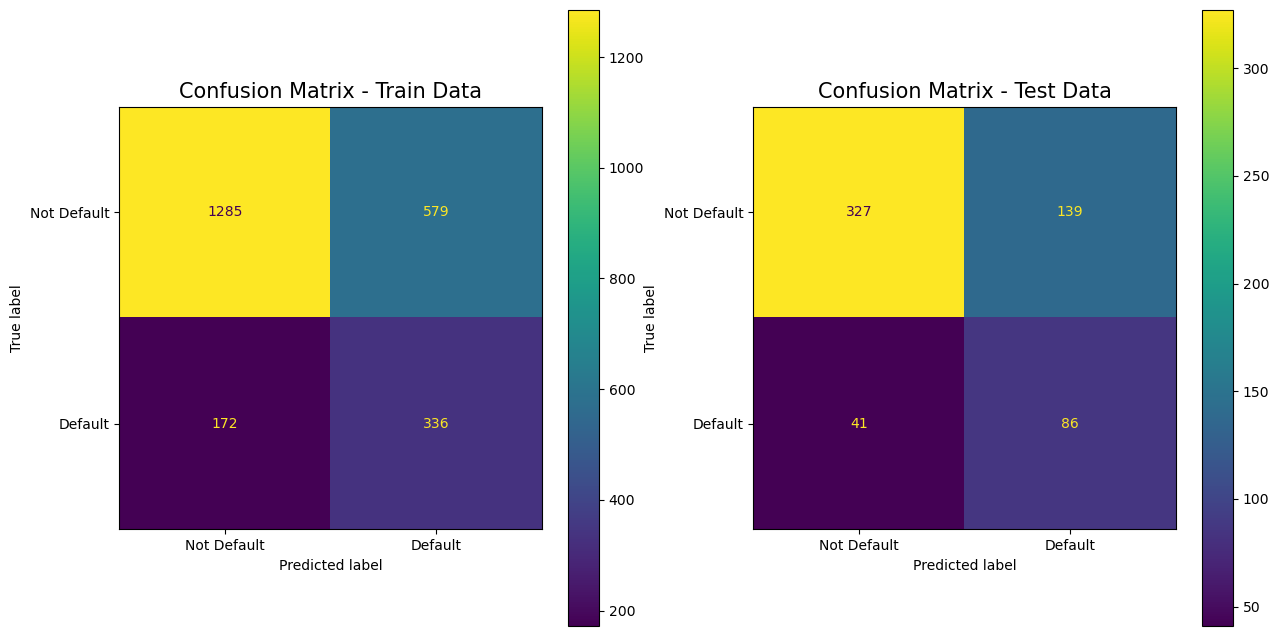

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=LogisticRegression(C=10, penalty='l2', solver='lbfgs', random_state=42))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

## Decision Tree Classifier


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1864
           1       0.85      0.70      0.77       508

    accuracy                           0.91      2372
   macro avg       0.89      0.84      0.86      2372
weighted avg       0.91      0.91      0.91      2372

ROC AUC Score: 0.8359995437802035

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       466
           1       0.51      0.39      0.44       127

    accuracy                           0.79       593
   macro avg       0.68      0.65      0.66       593
weighted avg       0.77      0.79      0.78       593

ROC AUC Score: 0.6453482477780407


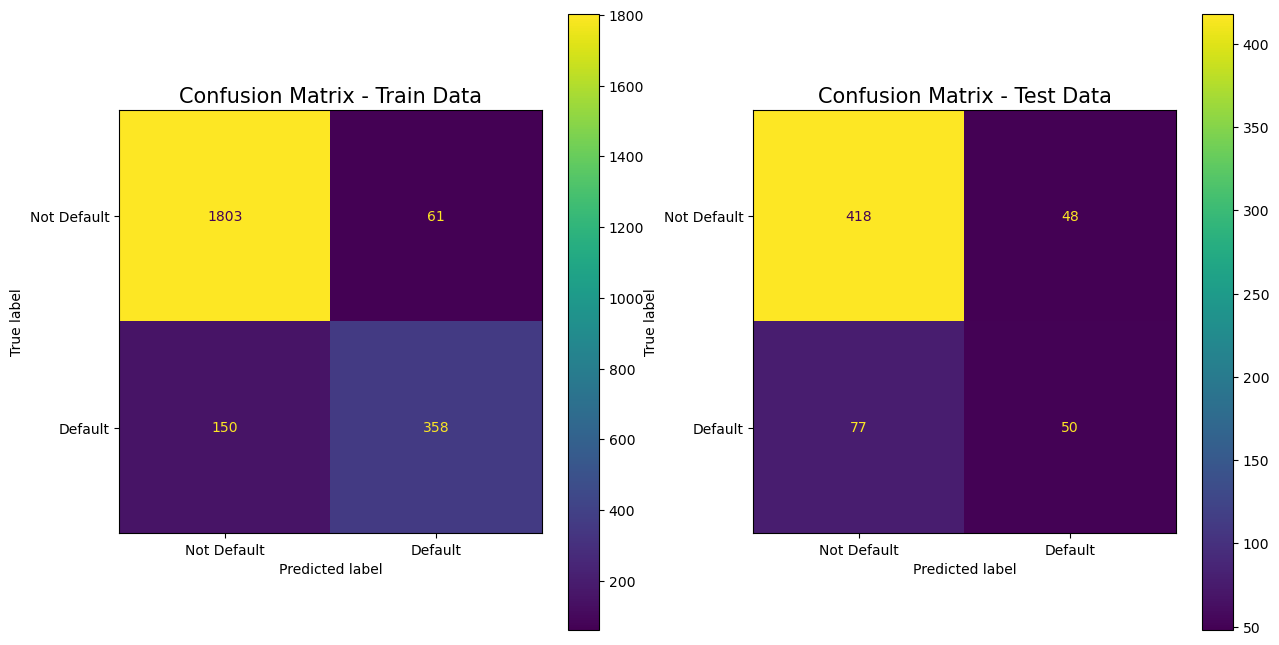

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=15, random_state=42))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

## SVC


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1864
           1       0.81      0.41      0.54       508

    accuracy                           0.85      2372
   macro avg       0.83      0.69      0.73      2372
weighted avg       0.85      0.85      0.83      2372

ROC AUC Score: 0.6903281403129329

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       466
           1       0.79      0.39      0.53       127

    accuracy                           0.85       593
   macro avg       0.82      0.68      0.72       593
weighted avg       0.84      0.85      0.83       593

ROC AUC Score: 0.6829018958467101


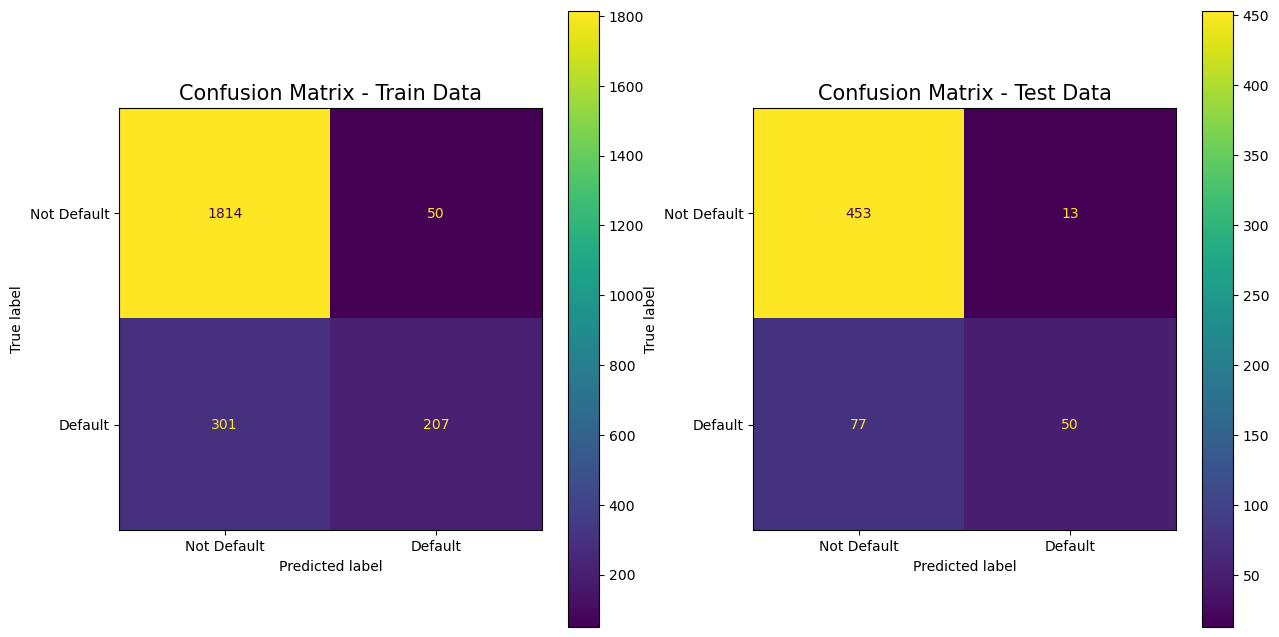

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=SVC(C=10, kernel= 'rbf', random_state=42))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

## Random Forest


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1864
           1       0.98      0.98      0.98       508

    accuracy                           0.99      2372
   macro avg       0.99      0.99      0.99      2372
weighted avg       0.99      0.99      0.99      2372

ROC AUC Score: 0.986938596194789

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       466
           1       0.62      0.46      0.52       127

    accuracy                           0.82       593
   macro avg       0.74      0.69      0.71       593
weighted avg       0.81      0.82      0.81       593

ROC AUC Score: 0.6897198472508533


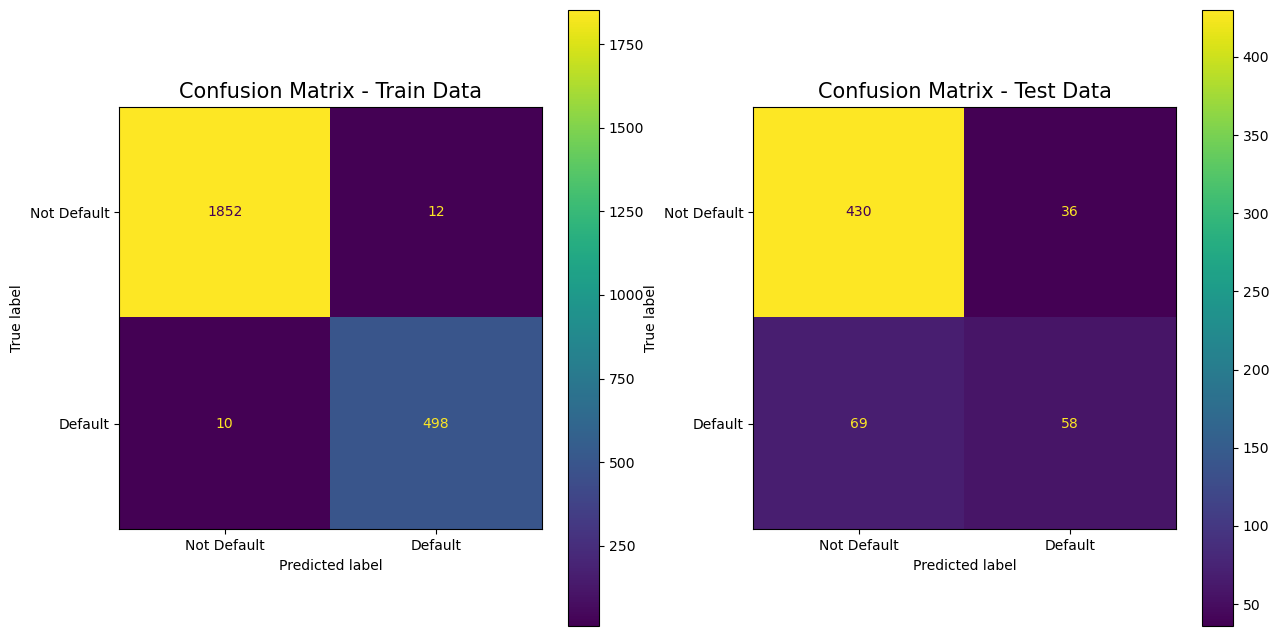

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=RandomForestClassifier(n_estimators= 100, max_depth= 20, min_samples_split= 5, max_features= 'auto'  ))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

## Gaussian


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.38      0.53      1864
           1       0.27      0.83      0.41       508

    accuracy                           0.48      2372
   macro avg       0.58      0.61      0.47      2372
weighted avg       0.76      0.48      0.51      2372

ROC AUC Score: 0.6080417187658409

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.40      0.54       466
           1       0.26      0.77      0.39       127

    accuracy                           0.48       593
   macro avg       0.56      0.58      0.47       593
weighted avg       0.73      0.48      0.51       593

ROC AUC Score: 0.5843246257307965


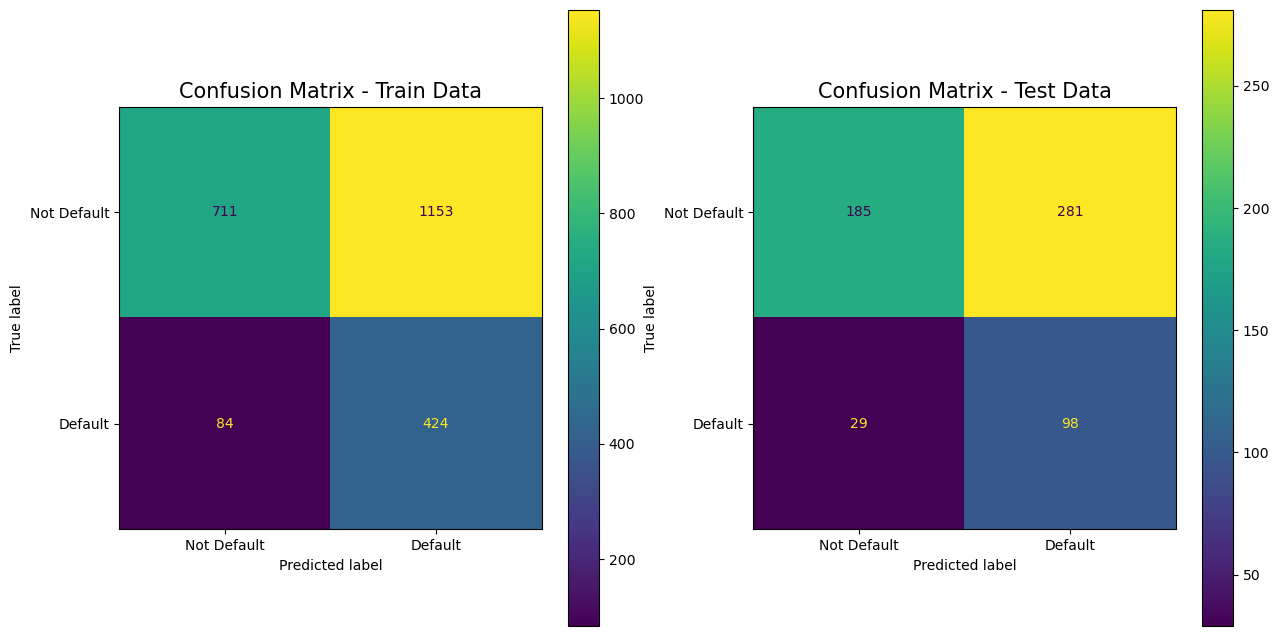

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=GaussianNB())
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

## KNeighborsClassifier


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1864
           1       1.00      1.00      1.00       508

    accuracy                           1.00      2372
   macro avg       1.00      1.00      1.00      2372
weighted avg       1.00      1.00      1.00      2372

ROC AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       466
           1       0.40      0.68      0.50       127

    accuracy                           0.71       593
   macro avg       0.64      0.70      0.65       593
weighted avg       0.79      0.71      0.73       593

ROC AUC Score: 0.6990976986245818


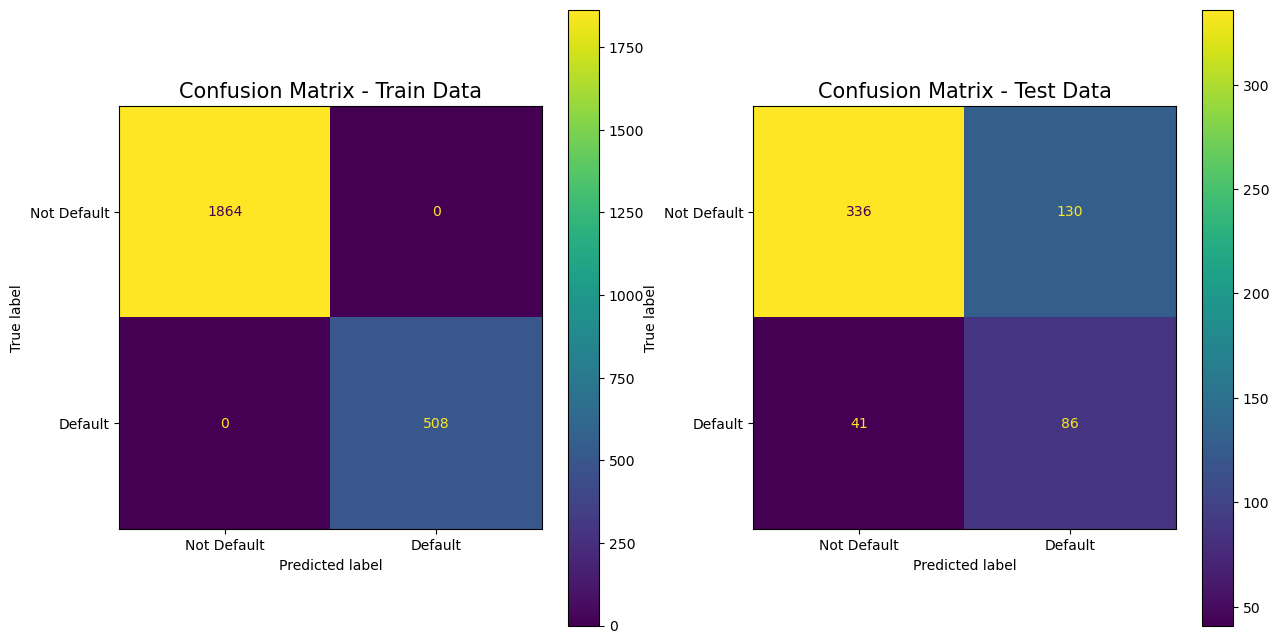

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=KNeighborsClassifier(algorithm='auto', n_neighbors=10, weights='distance'))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()


##  AdaBoostClassifier


Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.03      0.06      1864
           1       0.15      0.65      0.25       508

    accuracy                           0.17      2372
   macro avg       0.21      0.34      0.16      2372
weighted avg       0.24      0.17      0.10      2372

ROC AUC Score: 0.34197053158054813

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.03      0.06       466
           1       0.15      0.61      0.24       127

    accuracy                           0.16       593
   macro avg       0.19      0.32      0.15       593
weighted avg       0.22      0.16      0.10       593

ROC AUC Score: 0.3231810347740867


Text(0.5, 1.0, 'Confusion Matrix - Test Data')

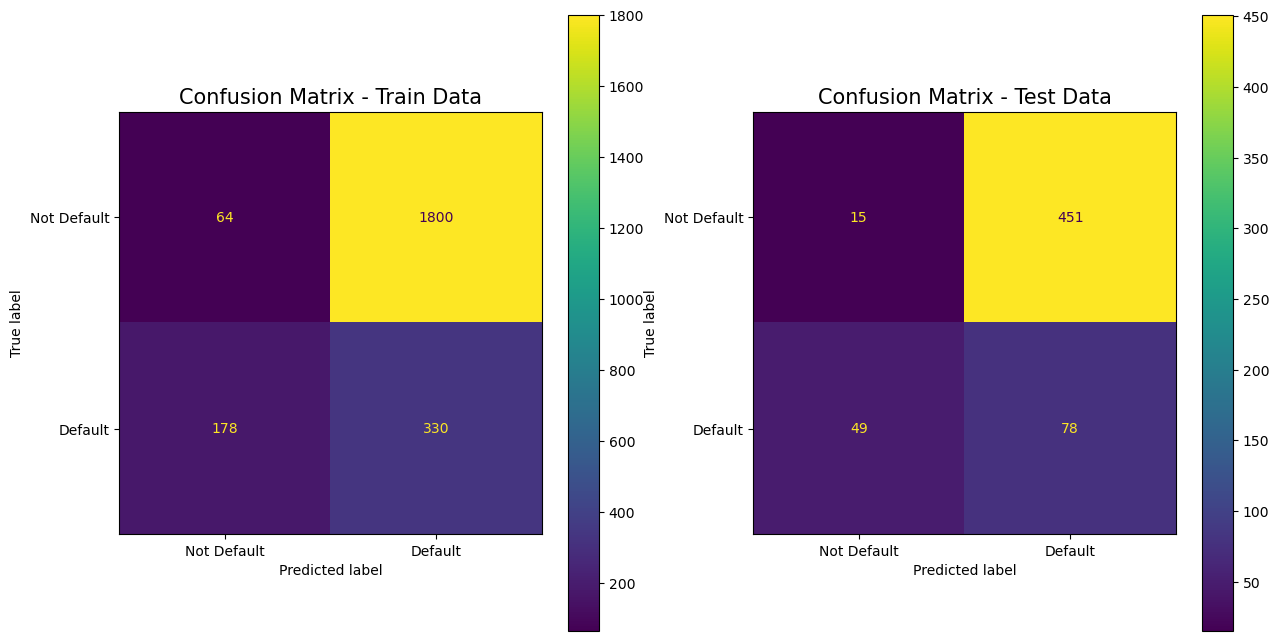

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=AdaBoostClassifier(n_estimators=50, learning_rate=10))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots

# Model Saving

In [ ]:
#Membuat model yang baru
with open('pipeline_tuned.pkl', 'wb') as f:
    
# Save the object to the file
    pickle.dump(pipeline_tuned, f)

# Model Inference

In [ ]:
# Step 1 Import Data

model = pickle.load(open('pipeline_tuned.pkl', 'rb'))

In [ ]:
model

Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('cat',
 Pipeline(steps=[('ordinal',
 OrdinalEncoder(categories=[[1,
 2],
 [0,
 1,
 2,
 3,
 4,
 5,
 6],
 [0,
 1,
 2,
 3],
 [-2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8],
 [-2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7],
 [-2,
 -1,
 0,
 2,
 3,
 4,
 5,
 6,
 7],
 [-2,
 -1,
 0,
 2,
 3,
 4,
 5,
 6,
 7,
 8],
 [-2,
 -1,
 0,
 2,
 3,
 4,
 5,
 6,
 7],
 [-2,
 -1,
 0,
 2,
 3,
 4,
 6,
 7]]))]),
 ['sex', 'education_level',
 'marital_status', 'pay_0',...
 Pipeline(steps=[('scaler',
 StandardScaler()),
 ('pca',
 PCA(n_components=6))]),
 ['limit_balance', 'age',
 'bill_amt_1', 'bill_amt_2',
 'bill_amt_3', 'bill_amt_4',
 'bill_amt_5', 'bill_amt_6',
 'pay_amt_1', 'pay_amt_2',
 'pay_amt_3', 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6'])])),
 ('sampling', SMOTE()),
 ('classifier',
 RandomForestClassifier(max_depth=20, max_features='auto',
 min_samples_split=5))]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('cat',
 Pipeline(steps=[('ordinal',
 OrdinalEncoder(categories=[[1,
 2],
 [0,
 1,
 2,
 3,
 4,
 5,
 6],
 [0,
 1,
 2,
 3],
 [-2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8],
 [-2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7],
 [-2,
 -1,
 0,
 2,
 3,
 4,
 5,
 6,
 7],
 [-2,
 -1,
 0,
 2,
 3,
 4,
 5,
 6,
 7,
 8],
 [-2,
 -1,
 0,
 2,
 3,
 4,
 5,
 6,
 7],
 [-2,
 -1,
 0,
 2,
 3,
 4,
 6,
 7]]))]),
 ['sex', 'education_level',
 'marital_status', 'pay_0',...
 Pipeline(steps=[('scaler',
 StandardScaler()),
 ('pca',
 PCA(n_components=6))]),
 ['limit_balance', 'age',
 'bill_amt_1', 'bill_amt_2',
 'bill_amt_3', 'bill_amt_4',
 'bill_amt_5', 'bill_amt_6',
 'pay_amt_1', 'pay_amt_2',
 'pay_amt_3', 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6'])])),
 ('sampling', SMOTE()),
 ('classifier',
 RandomForestClassifier(max_depth=20, max_features='auto',
 min_samples_split=5))]) preprocessor: ColumnTransformer ColumnTransformer(transformers=[('cat',
 Pipeline(steps=[('ordinal',
 OrdinalEncoder(categories=[[1,
 2],
 [0,
 1,
 2,
 3,
 4,
 5,
 6],
 [0,
 1,
 2,
 3],
 [-2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8],
 [-2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7],
 [-2,
 -1,
 0,
 2,
 3,
 4,
 5,
 6,
 7],
 [-2,
 -1,
 0,
 2,
 3,
 4,
 5,
 6,
 7,
 8],
 [-2,
 -1,
 0,
 2,
 3,
 4,
 5,
 6,
 7],
 [-2,
 -1,
 0,
 2,
 3,
 4,
 6,
 7]]))]),
 ['sex', 'education_level', 'marital_status',
 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
 'pay_6']),
 ('num',
 Pipeline(steps=[('scaler', StandardScaler()),
 ('pca', PCA(n_components=6))]),
 ['limit_balance', 'age', 'bill_amt_1',
 'bill_amt_2', 'bill_amt_3', 'bill_amt_4',
 'bill_amt_5', 'bill_amt_6', 'pay_amt_1',
 'pay_amt_2', 'pay_amt_3', 'pay_amt_4',
 'pay_amt_5', 'pay_amt_6'])]) cat ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'] OrdinalEncoder OrdinalEncoder(categories=[[1, 2], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3],
 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
 [-2, -1, 0, 2, 3, 4, 5, 6, 7],
 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8],
 [-2, -1, 0, 2, 3, 4, 5, 6, 7],
 [-2, -1, 0, 2, 3, 4, 6, 7]]) num ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'] StandardScaler StandardScaler() PCA PCA(n_components=6) SMOTE SMOTE() RandomForestClassifier RandomForestClassifier(max_depth=20, max_features='auto', min_samples_split=5)

In [ ]:
import pandas as pd
import importlib
importlib.reload(pd)

<module 'pandas' from '/opt/conda/lib/python3.9/site-packages/pandas/__init__.py'>

In [ ]:
# Step 2 Bikin Dataframe baru
a = {'limit_balance':[10000, 10000],
    'sex':[1, 2],
    'education_level':[2, 1],
    'marital_status':[1, 1],
    'age':[40, 55],
    'pay_0':[-1, -2],
    'pay_2':[-1, -2],
    'pay_3':[-1, -2],
    'pay_4':[-1, -2],
    'pay_5':[-1, -2],
    'pay_6':[-1, -2],
    'bill_amt_1':[12000, 55],
    'bill_amt_2':[1500, 55],
    'bill_amt_3':[11320, 55],
    'bill_amt_4':[100973, 55],
    'bill_amt_5':[13120, 55],
    'bill_amt_6':[33920, 55],
    'pay_amt_1':[132130, 55],
    'pay_amt_2':[131239, 55],
    'pay_amt_3':[14075, 55],
    'pay_amt_4':[12319, 55],
    'pay_amt_5':[13120, 55],
    'pay_amt_6':[13230, 55],
    }

b = pd.DataFrame(data=a)
b

In [ ]:
X_train

In [ ]:
model.predict(b.iloc[:2])

array([0, 0])

In [ ]:
b.iloc[:1]

# Konseptual Problem

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !
2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !
3. Bagaimana cara memilih K yang optimal pada KNN ?
4. Jelaskan apa yang dimaksud dengan Cross Validation !
5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

1. Criterion dalam decision tree adalah metode yang digunakan untuk mengukur kualitas pemisahan variabel target atau kelas dalam setiap node pada pohon keputusan. Setiap metode memiliki keunggulan dan kelemahan tertentu dalam menghasilkan pemisahan yang optimal pada pohon keputusan.
Dalam kasus ini, saya memilih Gini Index sebagai criterion karena umumnya Gini Index lebih cepat dan lebih efisien dibandingkan dengan Entropy dalam menghasilkan model decision tree yang baik. Namun, pilihan criterion dapat bervariasi tergantung pada jenis masalah yang dihadapi dan data yang digunakan.
2. Pruning adalah proses mengurangi ukuran pohon keputusan dengan menghilangkan cabang-cabang yang tidak signifikan. Pada dasarnya, pruning bertujuan untuk menghindari overfitting pada model pohon keputusan, di mana model terlalu rumit dan mampu "memorize" data training dengan akurasi yang sangat tinggi, tetapi kurang mampu untuk memprediksi data yang belum dilihat sebelumnya (data testing). Alasan untuk melakukan pruning adalah untuk menghindari overfitting, meningkatkan akurasi pada data testing, dan membuat model yang lebih sederhana dan mudah dipahami. jenisnya ada Pre-pruning, Post-pruning, Cost-complexity pruning, Reduced Error Pruning.
3. Menggunakan cross validation dan grid search
4. Metode ini melibatkan pembagian data training menjadi beberapa subset kecil (fold), lalu dilakukan pelatihan pada KNN dengan nilai K yang berbeda pada setiap iterasinya. Kemudian, dilakukan pengujian pada setiap subset yang tidak digunakan pada pelatihan, dan akhirnya dilakukan penghitungan akurasi rata-rata dari seluruh iterasi. Nilai K yang menghasilkan akurasi tertinggi pada validasi silang dapat dipilih sebagai nilai K optimal.
5. Accuracy mengukur seberapa sering model dapat membuat prediksi yang benar dari keseluruhan jumlah kasus yang diamati;
Precision mengukur seberapa banyak prediksi positif yang benar dari seluruh prediksi positif; Recall mengukur seberapa banyak prediksi positif yang benar dari seluruh jumlah kasus yang sebenarnya positif. Recall cocok digunakan pada kasus di mana penting untuk meminimalkan false negative; F1 Score mengkombinasikan precision dan recall menjadi satu nilai yang menunjukkan kinerja keseluruhan model. F1 Score cocok digunakan pada kasus di mana penting untuk mencapai keseimbangan antara precision dan recall.

# Kesimpulan

Dari banyak percobaan yang digunakan saya memilih menggunakan random forest classifier karena mengdapatkan nilai the best diantara semua model yang saya coba dengan nilai accuracy testnya 82%.
kesimpulan data yang didapat bahwa kebabnyakan pengutang tidak dapat mebayar tagihan di bulan berikutnya.